<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Tasa_Incidencia_por_Comuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
start_date = '2020-04-06'
end_date = '2020-04-13'

In [0]:
region = 'Metropolitana'

In [0]:
data_start = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/'+start_date+'-CasosConfirmados.csv',
    index_col='Region')
data_end = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/'+end_date+'-CasosConfirmados.csv', 
    index_col='Region')

In [0]:
data_region_start = data_start.loc[region].set_index('Comuna').copy()
data_region_end = data_end.loc[region].set_index('Comuna').copy()

In [6]:
data_region_start.head()

,Codigo region,Codigo comuna,Poblacion,Casos Confirmados
Comuna,,,,
Alhue,13,13502.0,7405,-
Buin,13,13402.0,109641,20
Calera de Tango,13,13403.0,28525,7
Cerrillos,13,13102.0,88956,5
Cerro Navia,13,13103.0,142465,31


In [0]:
data_region_start['Casos Confirmados'] = data_region_start['Casos Confirmados'].apply(lambda x: 0 if x=='-' else x)
data_region_start['Casos Confirmados'] = data_region_start['Casos Confirmados'].astype(int)

In [0]:
data_region_end = data_region_end[data_region_start['Casos Confirmados']>=1]
data_region_start = data_region_start[data_region_start['Casos Confirmados']>=1]

In [0]:
data_region_end['Casos Confirmados'] = data_region_end['Casos Confirmados'].astype(int)

In [0]:
data_region_start['Tasa Incidencia'] = data_region_start['Casos Confirmados']/data_region_start['Poblacion']*100000
data_region_end['Tasa Incidencia'] = data_region_end['Casos Confirmados']/data_region_end['Poblacion']*100000

In [11]:
data_region_end.head()

,Codigo region,Codigo comuna,Poblacion,Casos Confirmados,Tasa Incidencia
Comuna,,,,,
Buin,13,13402.0,109641,36,32.834432
Calera de Tango,13,13403.0,28525,10,35.056968
Cerrillos,13,13102.0,88956,29,32.600387
Cerro Navia,13,13103.0,142465,57,40.009827
Colina,13,13301.0,180353,74,41.030645


In [0]:
data = pd.DataFrame()
data['Tasa Incidencia '+start_date] = data_region_start['Tasa Incidencia']
data['Tasa Incidencia '+end_date] = data_region_end['Tasa Incidencia']
data['Increase'] = data['Tasa Incidencia '+end_date]/data['Tasa Incidencia '+start_date]*100-100.0

In [13]:
data.head()

,Tasa Incidencia 2020-04-06,Tasa Incidencia 2020-04-13,Increase
Comuna,,,
Buin,18.241351,32.834432,80.000000
Calera de Tango,24.539877,35.056968,42.857143
Cerrillos,5.620756,32.600387,480.000000
Cerro Navia,21.759730,40.009827,83.870968
Colina,27.723409,41.030645,48.000000


In [0]:
data = data.sort_values(by='Tasa Incidencia '+end_date, ascending=True)

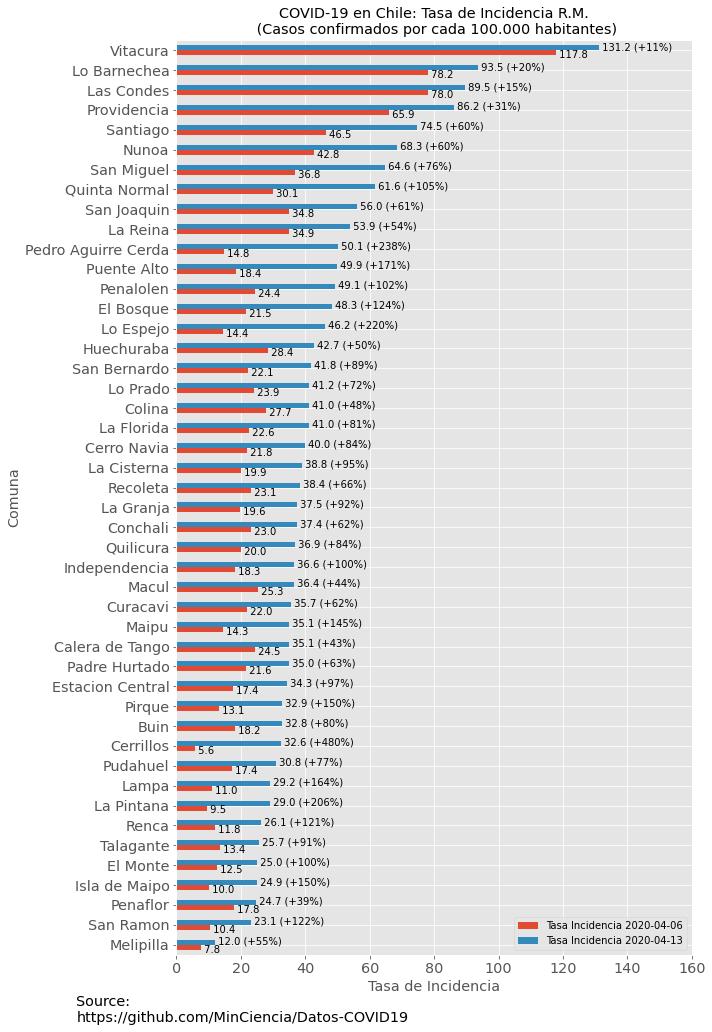

In [20]:
fig, ax = plt.subplots(figsize=(10,14))
data[['Tasa Incidencia '+start_date, 'Tasa Incidencia '+end_date]].plot(kind='barh', ax=ax, fontsize='x-large')
for i, val in enumerate(data['Tasa Incidencia '+end_date]):
  ax.text(val, i, f" {val:.1f} (+{data['Increase'].iloc[i]:.0f}%)", fontsize=10)
for i, val in enumerate(data['Tasa Incidencia '+start_date]):
  ax.text(val, i-0.4, f" {val:.1f}", fontsize=10)
ax.set_title(f'COVID-19 en Chile: Tasa de Incidencia R.M.\n (Casos confirmados por cada 100.000 habitantes)', fontsize='x-large')
ax.set_xlabel(f'Tasa de Incidencia', fontsize='x-large')
ax.set_ylabel(f'Comuna', fontsize='x-large')
plt.xlim(0,160)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-100,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('COVID-19-Chile-Tasa-Incidencia-Comuna.png', bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("COVID-19-Chile-Tasa-Incidencia-Comuna.png")